In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
bikes = pd.read_csv("boo.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
bikes.shape

(730, 16)

In [ ]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
bikes.mnth = bikes.mnth.map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})

bikes.weekday = bikes.weekday.map({1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat", 0:"Sun"})

bikes.weathersit = bikes.weathersit.map({1:"Clear", 2:"Cloudy", 3:"Rainy", 4:"Thunderstorm_or_snow"})

bikes.season = bikes.season.map({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"})

In [ ]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
bikes.drop(columns = ["instant","dteday", "casual", "registered"], axis = 1, inplace = True)

In [ ]:
# Exploratory Data Analysis (EDA)

In [ ]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [ ]:
cat_cols = bikes.select_dtypes(include = object).columns

num_cols = bikes.select_dtypes(include = ['int64','float64' ]).columns

In [ ]:
print(cat_cols)
print()
print(num_cols)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt'],
      dtype='object')


In [ ]:
bikes.season.value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

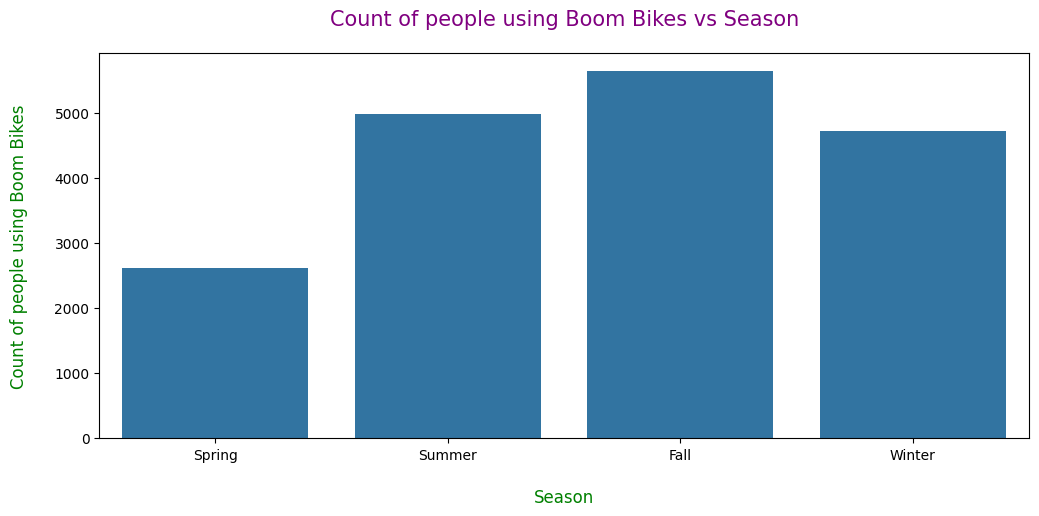

In [ ]:
# Visualizing the column "season" with "cnt"

plt.figure(figsize=[12,5])
sns.barplot(x = bikes["season"], y = bikes["cnt"], ci=None)
plt.title("Count of people using Boom Bikes vs Season", size = 15, color = "Purple", pad = 20)
plt.xlabel("\nSeason", size = 12, color = "green")
plt.ylabel("Count of people using Boom Bikes\n", size = 12, color = "green")
plt.show()

In [ ]:
bikes.mnth.value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

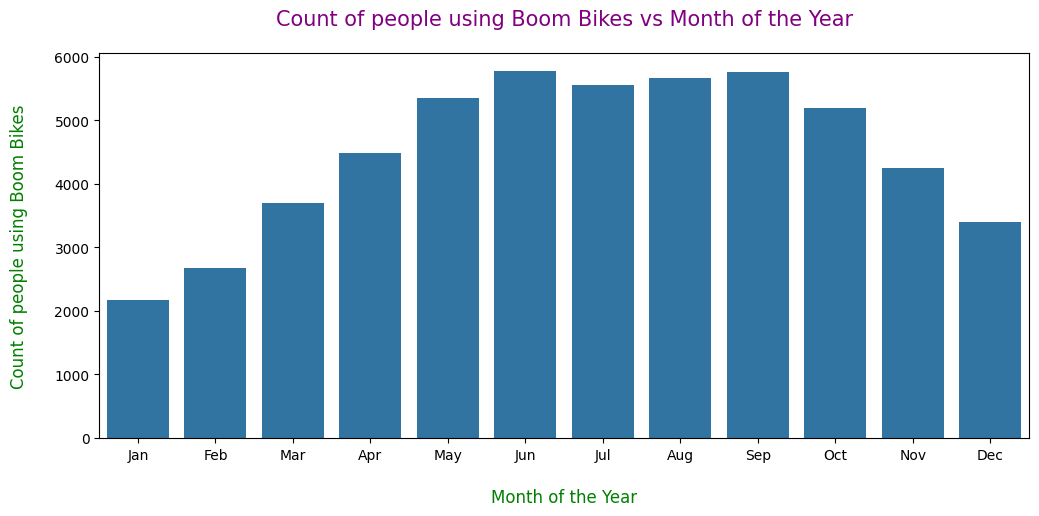

In [ ]:
# Visualizing the column "mnth" with "cnt"

plt.figure(figsize=[12,5])
sns.barplot(x = bikes["mnth"], y = bikes["cnt"], ci=None)
plt.title("Count of people using Boom Bikes vs Month of the Year", size = 15, color = "Purple", pad = 20)
plt.xlabel("\nMonth of the Year", size = 12, color = "green")
plt.ylabel("Count of people using Boom Bikes\n", size = 12, color = "green")
plt.show()


In [ ]:
bikes.weekday.value_counts()

weekday
Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: count, dtype: int64

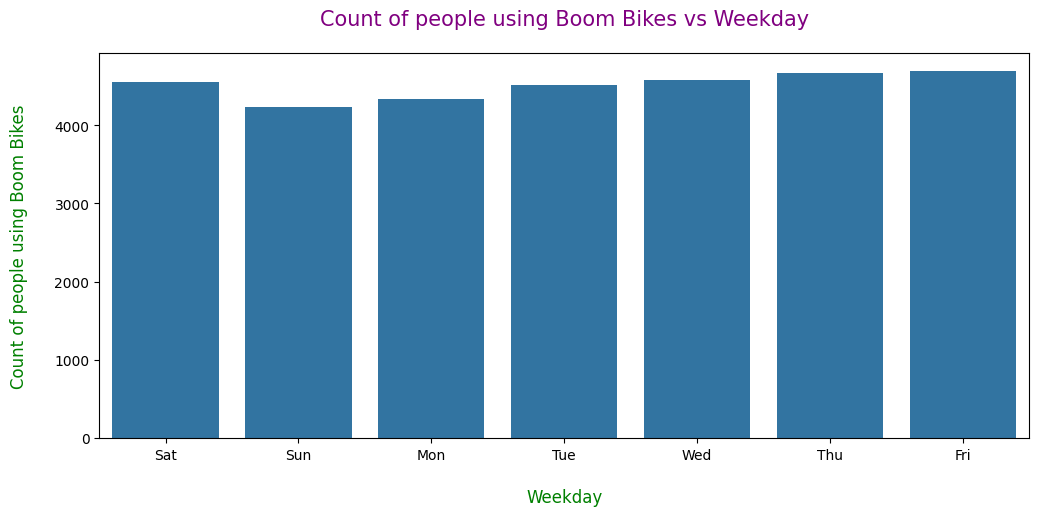

In [ ]:
# Visualizing the column "weekday" with "cnt"

plt.figure(figsize=[12,5])
sns.barplot(x = bikes["weekday"], y = bikes["cnt"], ci=None)
plt.title("Count of people using Boom Bikes vs Weekday", size = 15, color = "Purple", pad = 20)
plt.xlabel("\nWeekday", size = 12, color = "green")
plt.ylabel("Count of people using Boom Bikes\n", size = 12, color = "green")
plt.show()

In [ ]:
bikes.weathersit.value_counts()

weathersit
Clear     463
Cloudy    246
Rainy      21
Name: count, dtype: int64

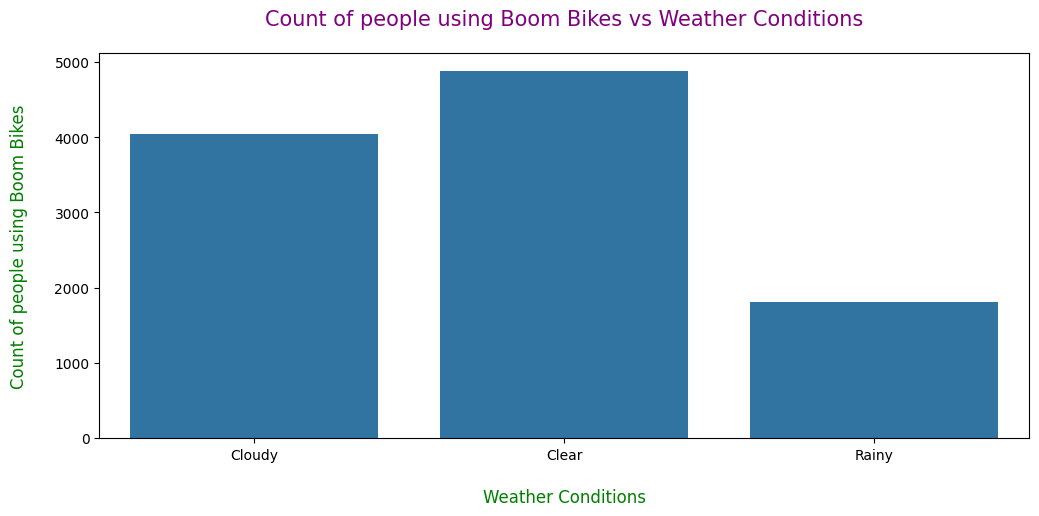

In [ ]:
# Visualizing the column "weathersit" with "cnt"

plt.figure(figsize=[12,5])
sns.barplot(x = bikes["weathersit"], y = bikes["cnt"], ci=None)
plt.title("Count of people using Boom Bikes vs Weather Conditions", size = 15, color = "Purple", pad = 20)
plt.xlabel("\nWeather Conditions", size = 12, color = "green")
plt.ylabel("Count of people using Boom Bikes\n", size = 12, color = "green")
plt.show()

In [ ]:
# Analyzing Numerical Columns

In [ ]:
num_cols

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt'],
      dtype='object')

In [ ]:
bikes.yr.value_counts()

yr
0    365
1    365
Name: count, dtype: int64

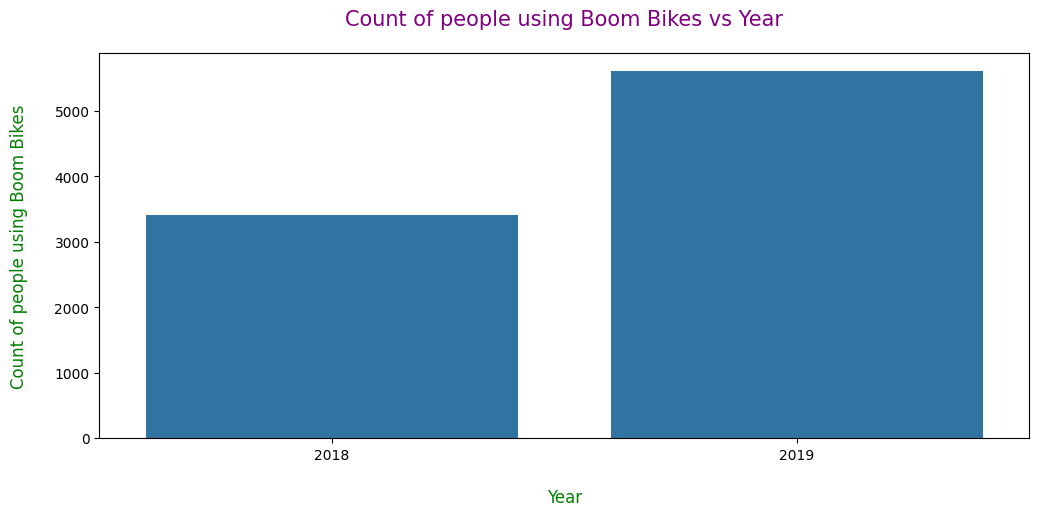

In [ ]:
# Visualizing the column "yr" with "cnt"

plt.figure(figsize=[12,5])
sns.barplot(x = bikes["yr"], y = bikes["cnt"], ci=None)
plt.title("Count of people using Boom Bikes vs Year", size = 15, color = "Purple", pad = 20)
plt.xlabel("\nYear", size = 12, color = "green")
plt.ylabel("Count of people using Boom Bikes\n", size = 12, color = "green")
plt.xticks(ticks = [0, 1], labels = ["2018","2019"])
plt.show()

In [ ]:
bikes.holiday.value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

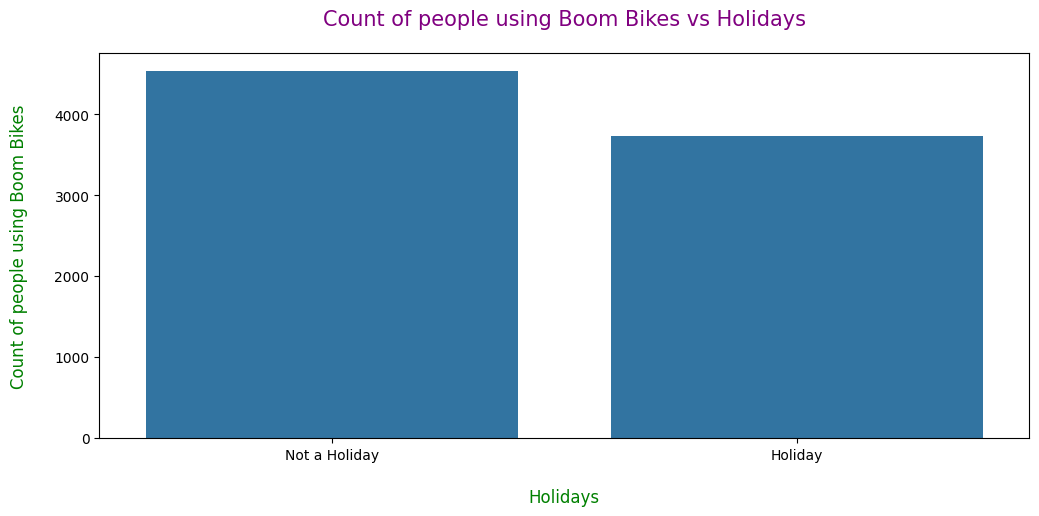

In [ ]:
# Visualizing the column "holiday" with "cnt"

plt.figure(figsize=[12,5])
sns.barplot(x = bikes["holiday"], y = bikes["cnt"], ci=None)
plt.title("Count of people using Boom Bikes vs Holidays", size = 15, color = "Purple", pad = 20)
plt.xlabel("\nHolidays", size = 12, color = "green")
plt.ylabel("Count of people using Boom Bikes\n", size = 12, color = "green")
plt.xticks(ticks = [0, 1], labels = ["Not a Holiday","Holiday"])
plt.show()

In [ ]:
bikes.workingday.value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

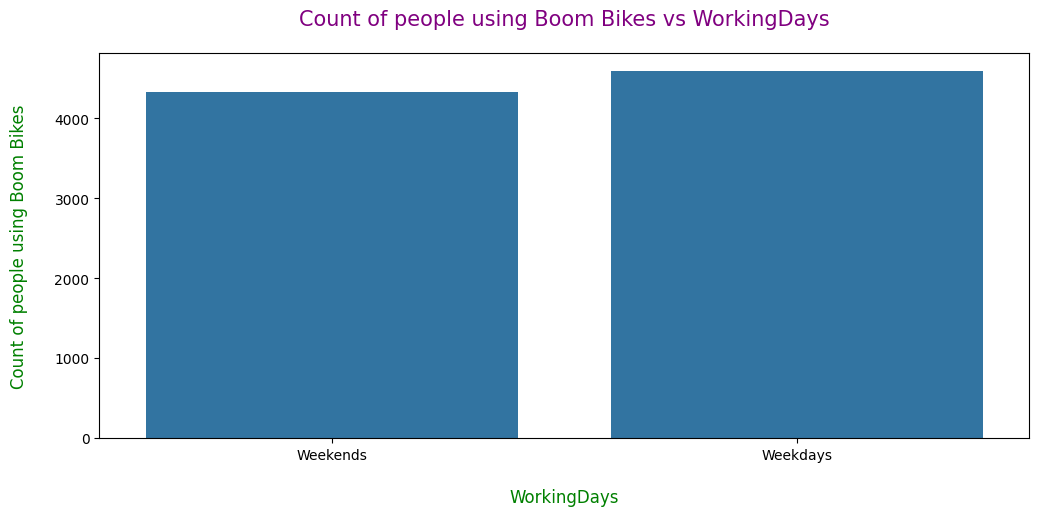

In [ ]:
# Visualizing the column "workingday" with "cnt"

plt.figure(figsize=[12,5])
sns.barplot(x = bikes["workingday"], y = bikes["cnt"], ci=None)
plt.title("Count of people using Boom Bikes vs WorkingDays", size = 15, color = "Purple", pad = 20)
plt.xlabel("\nWorkingDays", size = 12, color = "green")
plt.ylabel("Count of people using Boom Bikes\n", size = 12, color = "green")
plt.xticks(ticks = [0, 1], labels = ["Weekends","Weekdays"])
plt.show()

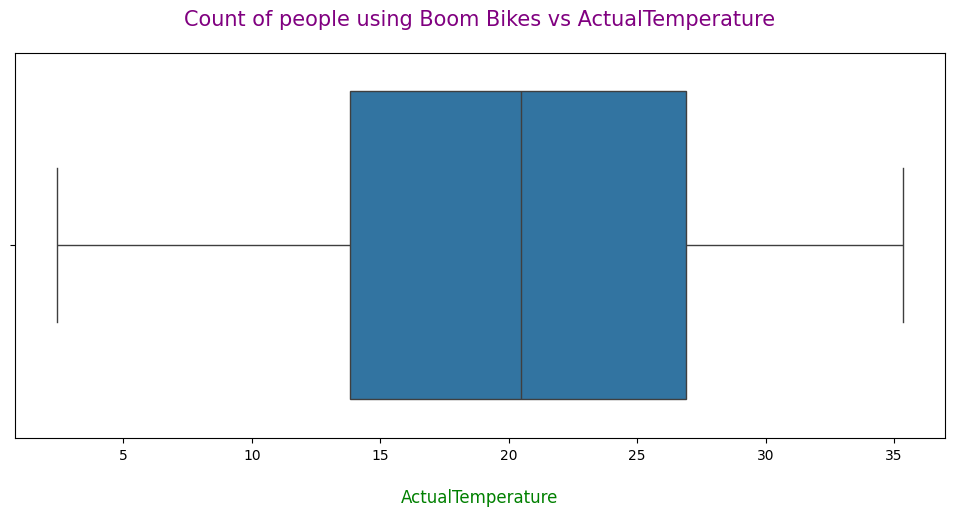

In [ ]:
# Visualizing the column "temp" with "cnt"

plt.figure(figsize=[12,5])
sns.boxplot(x = bikes["temp"])
plt.title("Count of people using Boom Bikes vs ActualTemperature", size = 15, color = "Purple", pad = 20)
plt.xlabel("\nActualTemperature", size = 12, color = "green")
plt.show()

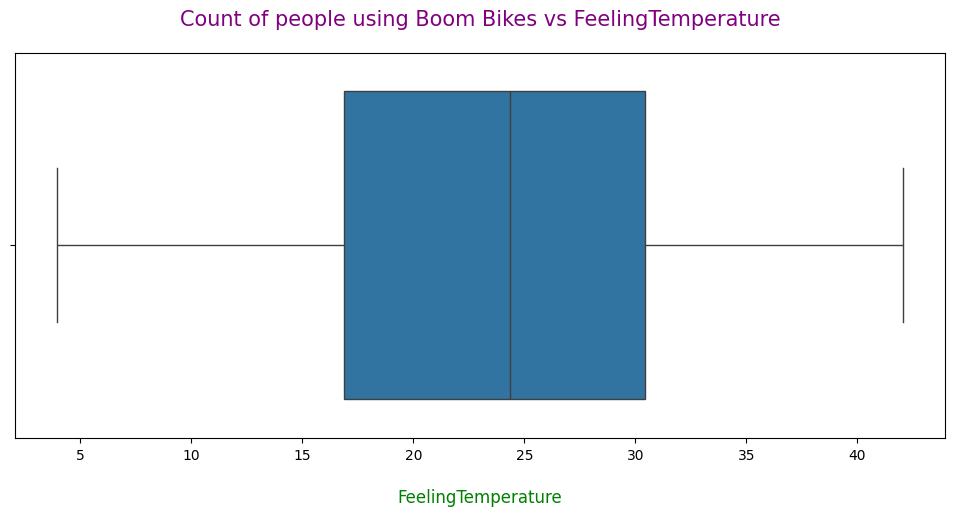

In [ ]:
# Visualizing the column "atemp" with "cnt"

plt.figure(figsize=[12,5])
sns.boxplot(x = bikes["atemp"])
plt.title("Count of people using Boom Bikes vs FeelingTemperature", size = 15, color = "Purple", pad = 20)
plt.xlabel("\nFeelingTemperature", size = 12, color = "green")
plt.show()

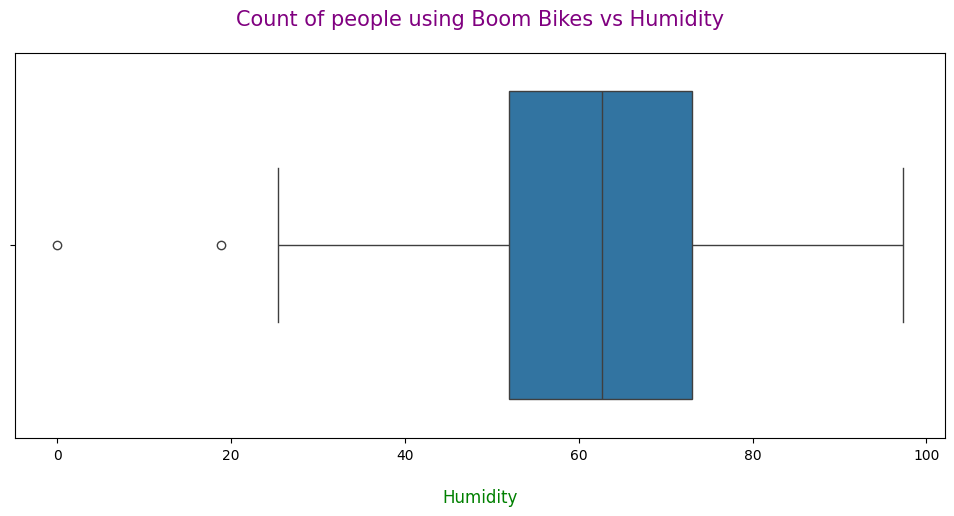

In [ ]:
# Visualizing the column "hum" with "cnt"

plt.figure(figsize=[12,5])
sns.boxplot(x = bikes["hum"])
plt.title("Count of people using Boom Bikes vs Humidity", size = 15, color = "Purple", pad = 20)
plt.xlabel("\nHumidity", size = 12, color = "green")
plt.show()

In [ ]:
bikes["hum"].describe(percentiles=[0.01,0.02,0.05,0.25,0.5,0.75])

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
1%        31.209593
2%        35.755014
5%        40.741735
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

In [ ]:
bikes = bikes[bikes["hum"] >= 20]

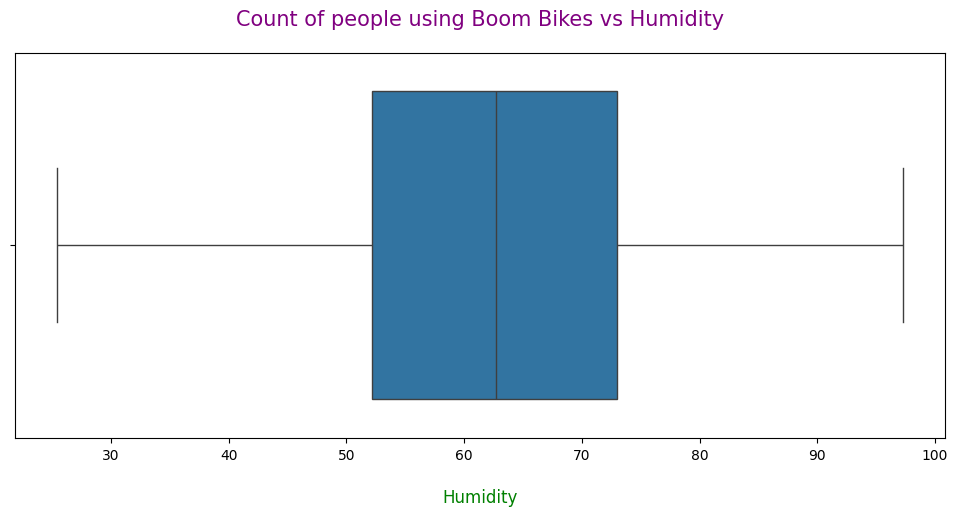

In [ ]:
# Visualizing the column "hum" with "cnt"

plt.figure(figsize=[12,5])
sns.boxplot(x = bikes["hum"])
plt.title("Count of people using Boom Bikes vs Humidity", size = 15, color = "Purple", pad = 20)
plt.xlabel("\nHumidity", size = 12, color = "green")
plt.show()

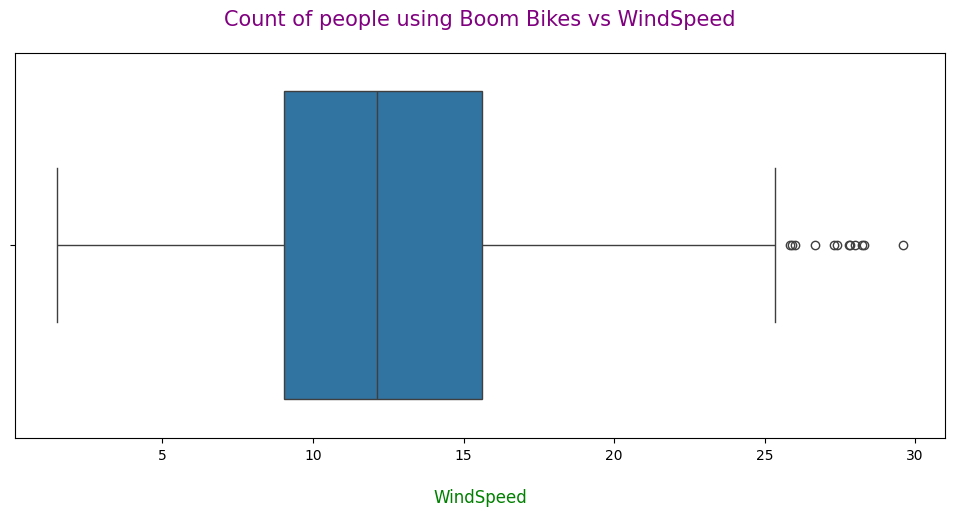

In [ ]:
# Visualizing the column "windspeed" with "cnt"

plt.figure(figsize=[12,5])
sns.boxplot(x = bikes["windspeed"])
plt.title("Count of people using Boom Bikes vs WindSpeed", size = 15, color = "Purple", pad = 20)
plt.xlabel("\nWindSpeed", size = 12, color = "green")
plt.show()

In [ ]:
bikes["windspeed"].describe(percentiles=[0.25,0.5,0.75,0.95,0.98,0.99])

count    728.000000
mean      12.727880
std        5.139840
min        1.500244
25%        9.031466
50%       12.125057
75%       15.624735
95%       22.985342
98%       25.121693
99%       27.123258
max       29.584721
Name: windspeed, dtype: float64

In [ ]:
# Removing the top 1%

Q3 = bikes.windspeed.quantile(0.99)
bikes = bikes[bikes["windspeed"] <= Q3]

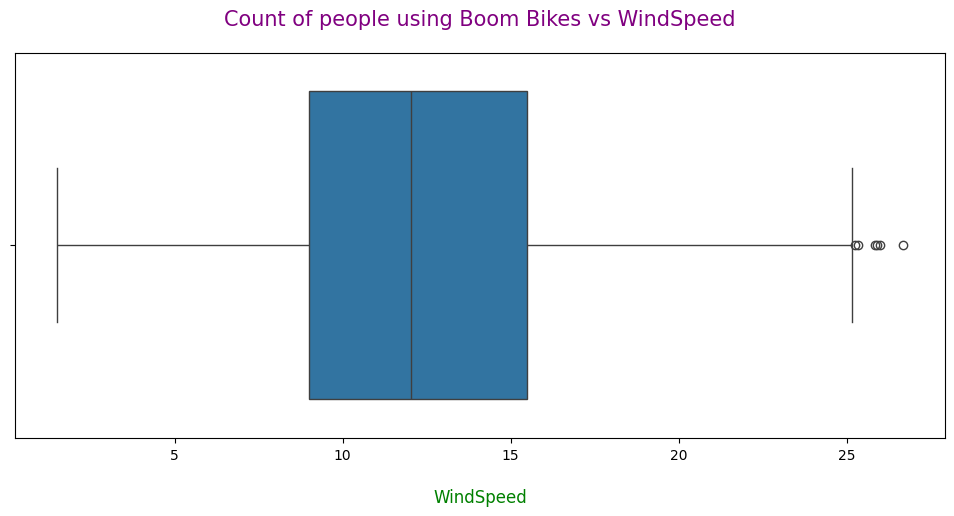

In [ ]:
#  Visualizing the column "windspeed" with "cnt"

plt.figure(figsize=[12,5])
sns.boxplot(x = bikes["windspeed"])
plt.title("Count of people using Boom Bikes vs WindSpeed", size = 15, color = "Purple", pad = 20)
plt.xlabel("\nWindSpeed", size = 12, color = "green")
plt.show()

In [ ]:
bikes = bikes[bikes["windspeed"].apply(lambda x: type(x) == float)]

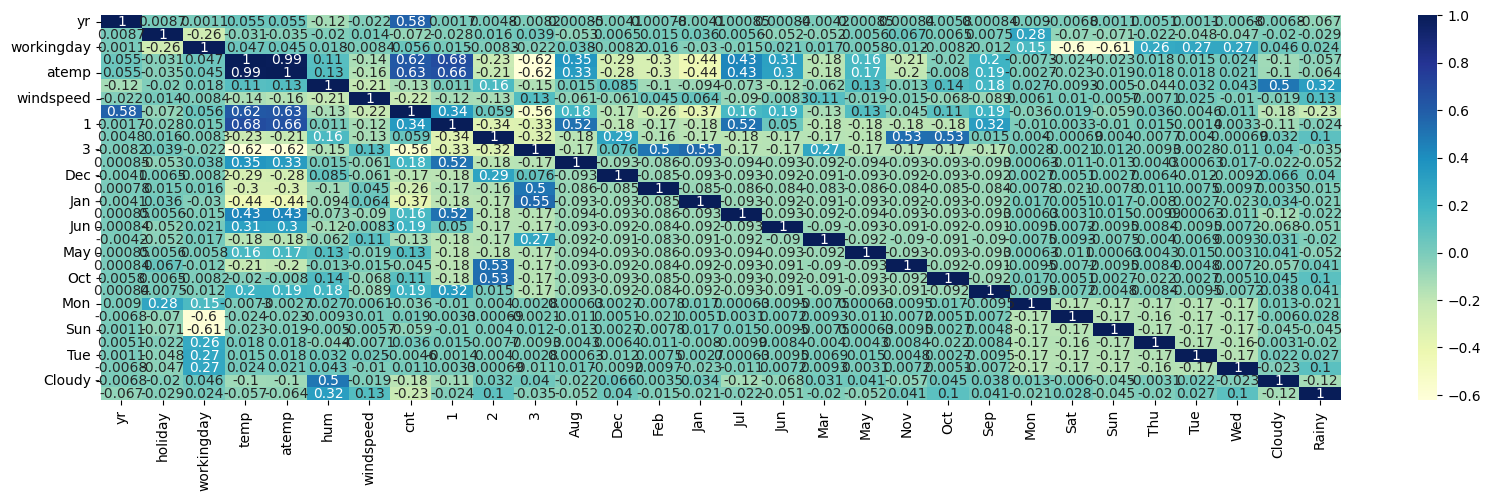

In [ ]:
heat = bikes.corr()

plt.figure(figsize=[20,5])
sns.heatmap(heat, cmap = 'YlGnBu', annot = True)
plt.show()

In [ ]:
# Preparing the dataframe for modelling

In [ ]:
import pandas as pd

# Convert 'season' column to numeric using mapping
season_mapping = {'Summer': 0, 'Fall': 1, 'Winter': 2, 'Spring': 3}
bikes['season'] = bikes['season'].map(season_mapping)

# Verify that 'season' is now numeric
print(bikes['season'].dtype)

int64


In [ ]:
list(cat_cols)

['season', 'mnth', 'weekday', 'weathersit']

In [ ]:
dummy = pd.get_dummies(bikes["season"], drop_first = True)
bikes = pd.concat([bikes, dummy], axis = 1)

dummy = pd.get_dummies(bikes["mnth"], drop_first = True)
bikes = pd.concat([bikes, dummy], axis = 1)

dummy = pd.get_dummies(bikes["weekday"], drop_first = True)
bikes = pd.concat([bikes, dummy], axis = 1)

dummy = pd.get_dummies(bikes["weathersit"], drop_first = True)
bikes = pd.concat([bikes, dummy], axis = 1)

In [ ]:
bikes.drop(columns = list(cat_cols), axis = 1, inplace = True)

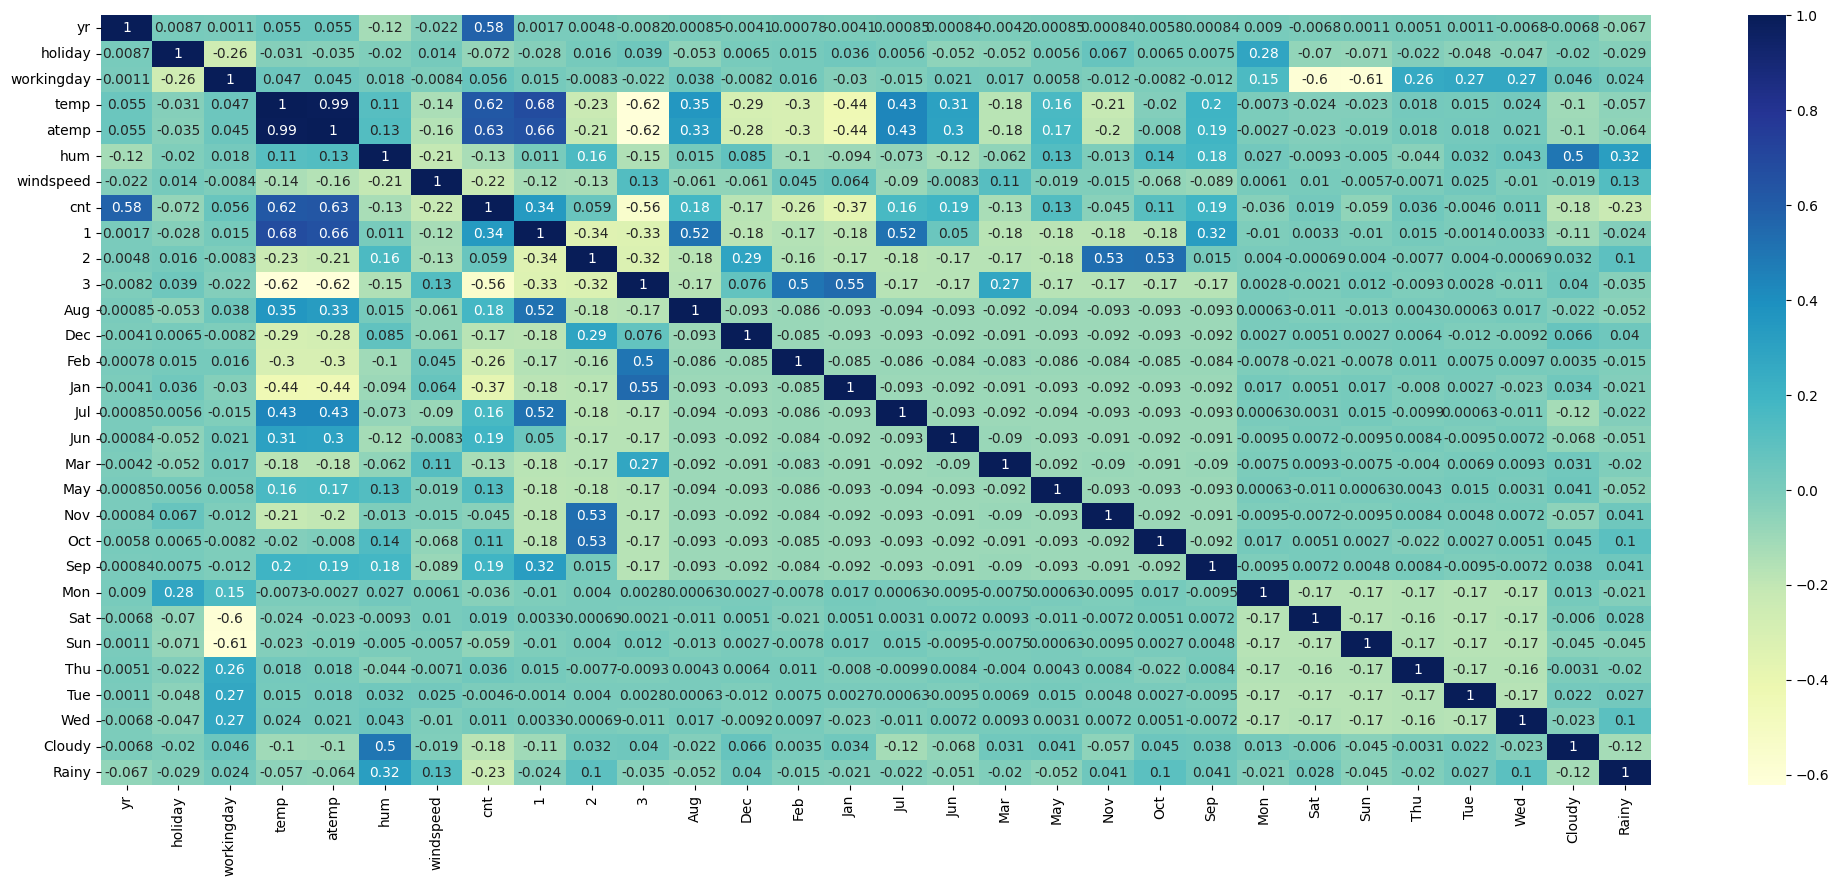

In [ ]:
heat1 = bikes.corr()

plt.figure(figsize=[25,10])
sns.heatmap(heat1, cmap = 'YlGnBu', annot = True)
plt.show()

In [ ]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          720 non-null    int64  
 1   holiday     720 non-null    int64  
 2   workingday  720 non-null    int64  
 3   temp        720 non-null    float64
 4   atemp       720 non-null    float64
 5   hum         720 non-null    float64
 6   windspeed   720 non-null    float64
 7   cnt         720 non-null    int64  
 8   1           720 non-null    bool   
 9   2           720 non-null    bool   
 10  3           720 non-null    bool   
 11  Aug         720 non-null    bool   
 12  Dec         720 non-null    bool   
 13  Feb         720 non-null    bool   
 14  Jan         720 non-null    bool   
 15  Jul         720 non-null    bool   
 16  Jun         720 non-null    bool   
 17  Mar         720 non-null    bool   
 18  May         720 non-null    bool   
 19  Nov         720 non-null    bool  

In [ ]:
cols_to_scale = ['temp', 'atemp', 'hum', 'windspeed','cnt']

In [ ]:
# Using train_test_split to split the dataframe

df_train, df_test = train_test_split(bikes, train_size = 0.7, random_state = 100)

In [ ]:
y_train = df_train.pop('cnt')

X_train = df_train

In [ ]:
scaler = MinMaxScaler()

df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,1,2,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Rainy
728,1,0,0,0.245101,0.200348,0.319025,0.865984,0.212710,False,False,...,False,False,False,False,True,False,False,False,False,False
481,1,0,1,0.496388,0.490358,0.204176,0.857133,0.744724,False,False,...,False,False,False,False,False,False,False,False,False,False
114,0,0,1,0.682257,0.650319,0.727379,0.396837,0.485731,False,False,...,False,False,True,False,False,False,False,False,False,False
581,1,0,0,0.884740,0.855850,0.554524,0.694875,0.652518,True,False,...,False,False,False,False,True,False,False,False,False,False
499,1,0,1,0.688488,0.652819,0.752320,0.289234,0.610671,False,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
lm = LinearRegression()


rfe = RFE(lm, n_features_to_select=15)



In [ ]:
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

In [ ]:
rfe.fit(X_train, y_train)

n_rfe_cols = X_train.columns[~rfe.support_]
n_rfe_cols

In [ ]:
n_rfe_cols = X_train.columns[~rfe.support_]
n_rfe_cols

In [ ]:
result=num_cols

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
y_train_pred = result.predict(X_train_sm)

In [ ]:
df_test[cols_to_scale] = scaler.transform(df_test[cols_to_scale])

df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,1,2,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Rainy
201,0,0,1,0.941851,0.980934,0.608468,0.500887,0.451079,True,False,...,False,False,False,False,False,True,False,False,True,False
496,1,0,0,0.629300,0.611356,0.314965,0.220433,0.888129,False,False,...,False,False,False,True,False,False,False,False,False,False
369,1,0,1,0.257562,0.261664,0.375870,0.239872,0.389688,False,False,...,False,False,False,False,False,True,False,False,False,False
629,1,0,0,0.736253,0.697558,0.546404,0.675482,1.003957,True,False,...,False,True,False,True,False,False,False,False,False,False
645,1,1,0,0.403972,0.404998,0.633990,0.409163,0.654197,False,True,...,True,False,True,False,False,False,False,False,True,False


In [ ]:
df_test.yr.value_counts()

yr
0    112
1    105
Name: count, dtype: int64

In [ ]:
y_test = df_test.pop("cnt")

X_test = df_test

In [ ]:
X_test.drop(labels=[1], axis=1, inplace=True)
X_test.drop(columns = ["Nov", "atemp", "Sun", "holiday"], axis = 1, inplace = True)

In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
result

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt'],
      dtype='object')